## Predicting Sale Price of Bull Dozers using Machine Learning

## 1.Problem Definition
> How well can we predict the future sales price for Bull Dozers based on some characteristics and how much similar bulldozers have been sold for in the past
## 2. Data
>  Data is downloaded from previous Kaggle competition data: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are three main data sets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices. For more on evaluation of the project, refer here: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

Note: Goal for regression models is mostly to minimize errors. In this project, it is to minimize RMSLE

## 4. Features
Kaggle provides the data dictionary that is available when we download the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [238]:
## Import training and validation data set
df = pd.read_csv("data/TrainAndValid.csv",low_memory=False)

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425155 entries, 0 to 425154
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   425155 non-null  int64  
 1   SalePrice                 425155 non-null  float64
 2   MachineID                 425155 non-null  int64  
 3   ModelID                   425155 non-null  int64  
 4   datasource                425155 non-null  int64  
 5   auctioneerID              405019 non-null  float64
 6   YearMade                  425155 non-null  int64  
 7   MachineHoursCurrentMeter  149633 non-null  float64
 8   UsageBand                 75504 non-null   object 
 9   saledate                  425155 non-null  object 
 10  fiModelDesc               425155 non-null  object 
 11  fiBaseModel               425155 non-null  object 
 12  fiSecondaryDesc           280453 non-null  object 
 13  fiModelSeries             60673 non-null   o

In [6]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

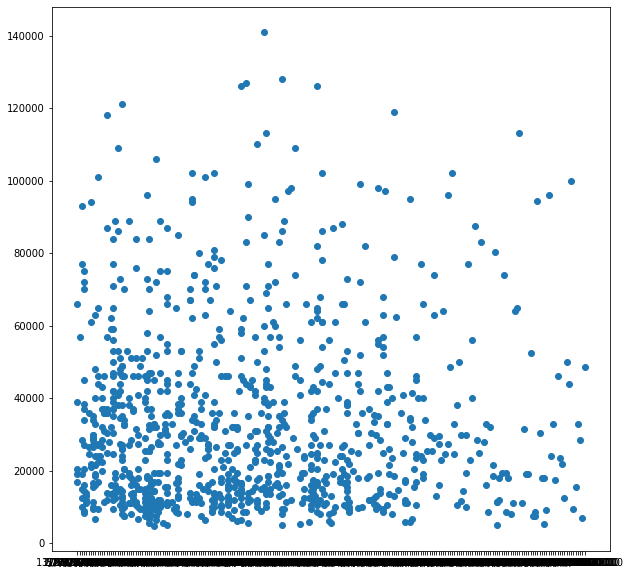

In [7]:
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(df['saledate'][:1000],df["SalePrice"][:1000])

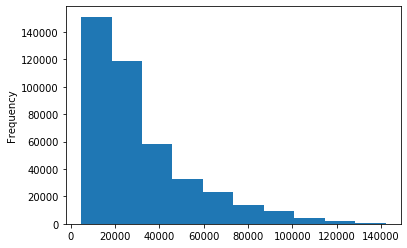

In [9]:
df["SalePrice"].plot.hist()

## Parsing Dates

When working with data containing time series information, we need to enrich the time and date component as much as possible. This can be done by telling pandas which of the fields are date columns using the `Parse_Dates`parameter.

In [240]:
df = pd.read_csv("data/TrainAndValid.csv",low_memory = False, parse_dates=["saledate"])

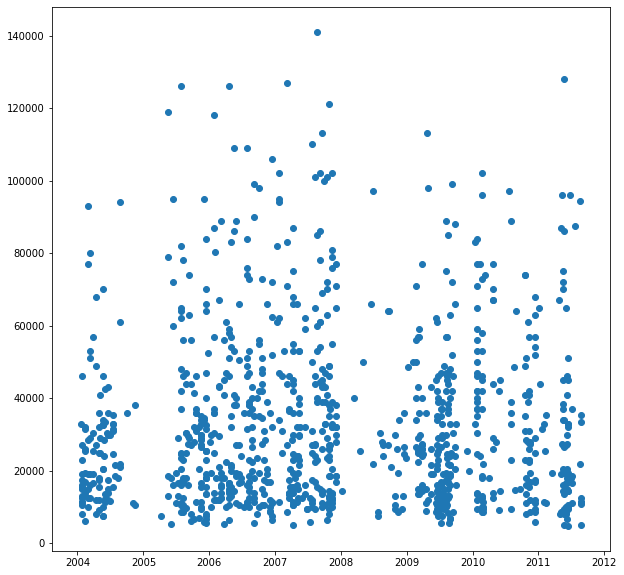

In [11]:
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(df['saledate'][:1000],df["SalePrice"][:1000])

In [16]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [241]:
## sort dataframe by salesdate
df.sort_values(by=["saledate"],inplace = True,ascending = True)

In [18]:
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [242]:
## Make a copy of the dataframe so that when we manipulate, original data is retained to revert
df_tmp = df.copy()

In [10]:
df_tmp.head(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
54653,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
81383,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
113390,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
## Add datetime parameters for saledate column
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] =df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [124]:
df_tmp["saleDay"]

205615    17
274835    31
141296    31
212552    31
62755     31
          ..
410879    28
412476    28
411927    28
407124    28
409203    28
Name: saleDay, Length: 412698, dtype: int64

In [148]:
df_tmp.tail().T

,410879,412476,411927,407124,409203
SalesID,6302984,6324811,6313029,6266251,6283635
SalePrice,16000,6000,16000,55000,34000
MachineID,1915521,1919104,1918416,509560,1869284
ModelID,5266,19330,17244,3357,4701
datasource,149,149,149,149,149
auctioneerID,99,99,99,99,99
YearMade,2001,2004,2004,1993,1000
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00


In [226]:
df_tmp.drop("saledate",axis=1,inplace = True)

## 5. Modelling
Performing model driven EDA.
Let us build a machine learning model

In [151]:
%%time
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs = -1, random_state = 42)
model.fit(df_tmp.drop("SalePrice",axis = 1),df_tmp["SalePrice"])

ValueError: could not convert string to float: 'Low'

In [39]:
abc = df_tmp.columns
abc[0]

'SalesID'

## Converting non number data to numbers

One way to do it is to turn them into Panda Categories. Below link has some utilities related to Pandas Datatypes
https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html
    

In [227]:
## Find the columns that are of string type so as to convert them into numbers
strcol = []
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        strcol.append(label)
        df_tmp[label] = content.astype("category").cat.as_ordered() 
        
strcol

['UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [141]:
np.asarray(df_tmp["state"])

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [125]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [108]:
##df_tmp["fiBaseModel"] = df_tmp["fiBaseModel"].astype("category")
df_tmp["fiBaseModel"].dtypes,pd.api.types.is_string_dtype(df_tmp["fiBaseModel"]),pd.api.types.is_categorical(df_tmp["fiBaseModel"])

(dtype('int16'), False, False)

In [291]:
pd.Categorical(df_tmp["state"]).codes

array([43,  8,  8, ..., 50,  2, 19], dtype=int8)

In [109]:
df_tmp.state.cat.categories

AttributeError: Can only use .cat accessor with a 'category' dtype

In [129]:
##Thanks to categories we have converted all strings to numbers
##(Category assigns number to each string value as seen for state through "codes" below)
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [180]:
## Check for missing data
X_train.isna().sum()/len(X_train)

SalesID                     0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.050199
YearMade                    0.000000
MachineHoursCurrentMeter    0.644089
UsageBand                   0.826391
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.342016
fiModelSeries               0.858129
fiModelDescriptor           0.820707
ProductSize                 0.525460
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.739829
Enclosure                   0.000810
Forks                       0.521154
Pad_Type                    0.802720
Ride_Control                0.629527
Stick                       0.802720
Transmission                0.543210
Turbocharged                0.802720
Blade_Extension             0.937129
B

In [49]:
## Save preprocessed data
#df_tmp.to_csv("data/train_tmp.csv", index = False)

In [176]:
df_tmp = pd.read_csv("data/train_tmp.csv", low_memory =False)

In [156]:
df_tmp["MachineHoursCurrentMeter"].isnull().sum()

265194

In [228]:
##Fill numerical null values
numcol = []
for cols in df_tmp.columns:
    if pd.api.types.is_numeric_dtype(df_tmp[cols]) and df_tmp[cols].isnull().sum() >0:
        numcol.append(cols)
numcol

['auctioneerID', 'MachineHoursCurrentMeter']

In [229]:
for cols in df_tmp.columns:
    if pd.api.types.is_numeric_dtype(df_tmp[cols]) and df_tmp[cols].isnull().sum() >0:
        df_tmp[cols+"_is_missing"] = df_tmp[cols].isnull()
        df_tmp[cols] = df_tmp[cols].fillna(df_tmp[cols].median())    

In [189]:
X_train[X_train["auctioneerID_is_missing"] == True].head().T

,154248,222492,222506,222512,222533
SalesID,2357213,2331246,2410578,2338305,2274219
MachineID,1702442,1700283,1386646,1705197,1779952
ModelID,22172,8265,198,4701,4139
datasource,136,136,136,136,136
auctioneerID,2,2,2,2,2
YearMade,2003,1000,1000,1999,1976
MachineHoursCurrentMeter,9044,0,0,5900,0
UsageBand,High,NaN,NaN,Medium,NaN
fiModelDesc,750CIILGP,670,D32P-1,544H,D7G
fiBaseModel,750,670,D32,544,D7


In [143]:
df_tmp[(df_tmp["auctioneerID_is_missing"] == True) & (df_tmp["auctioneerID"] ==2)].head().T

,154248,222492,222506,222512,222533
SalesID,2357213,2331246,2410578,2338305,2274219
SalePrice,37000,21500,22000,48000,36000
MachineID,1702442,1700283,1386646,1705197,1779952
ModelID,22172,8265,198,4701,4139
datasource,136,136,136,136,136
auctioneerID,2,2,2,2,2
YearMade,2003,1000,1000,1999,1976
MachineHoursCurrentMeter,9044,0,0,5900,0
UsageBand,High,NaN,NaN,Medium,NaN
fiModelDesc,750CIILGP,670,D32P-1,544H,D7G


In [133]:
## Filling categorical variables that aren't numeric but have missing values
catcol = []
for cols in df_tmp.columns:
    if not pd.api.types.is_numeric_dtype(df_tmp[cols]):
        catcol.append(cols)
        
catcol

['UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [21]:
pd.Categorical(df_tmp["UsageBand"]).codes
## The -1 is used when the values are null and categorical codes cannot be assigned. 
##Hence, when categorical columns have null, need to increment by 1 so that -1 becomes 0

array([-1, -1, -1, ..., -1, -1, -1], dtype=int8)

In [230]:
for labels,content in df_tmp.items():
    if (not pd.api.types.is_numeric_dtype(content)):
        df_tmp[labels+"is_missing"] = pd.isnull(content)
        df_tmp[labels] = pd.Categorical(content).codes + 1    

In [231]:
df_tmp.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_Mountingis_missing     0
Blade_Typeis_missing           0
Travel_Controlsis_missing      0
Differential_Typeis_missing    0
Steering_Controlsis_missing    0
Length: 103, dtype: int64

In [145]:
%%time
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs = -1, random_state = 42)
model.fit(df_tmp.drop("SalePrice",axis = 1),df_tmp["SalePrice"])

Wall time: 9min 40s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [146]:
model.score(df_tmp.drop("SalePrice",axis = 1),df_tmp["SalePrice"])

0.9875445816591006

In [151]:
df_tmp["saleYear"].value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [250]:
##Split data into training and validation set
df_val =df_tmp[(df_tmp["saleYear"] == 2012) & (df_tmp["SalePrice"] > 0)]
df_test = df_tmp[(df_tmp["saleYear"] == 2012) & (df_tmp["SalePrice"] == 0)]
df_train = df_tmp[df_tmp["saleYear"] != 2012]
len(df_val), len(df_train), len(df_test)

(11573, 401125, 12457)

In [251]:
X_train = df_train.drop("SalePrice",axis = 1)
y_train = df_train["SalePrice"]
X_val = df_val.drop("SalePrice",axis = 1)
y_val = df_val["SalePrice"]
X_test = df_test.drop("SalePrice",axis = 1)

In [252]:
X_train.shape, y_train.shape, X_test.shape,y_test.shape,X_val.shape,y_val.shape

((401125, 102), (401125,), (12457, 102), (11573,), (11573, 102), (11573,))

In [175]:
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Widthis_missing', 'Stick_Lengthis_missing',
       'Thumbis_missing', 'Pattern_Changeris_missing',
       'Grouser_Typeis_missing', 'Backhoe_Mountingis_missing',
       'Blade_Typeis_missing', 'Travel_Controlsis_missing',
       'Differential_Typeis_missing', 'Steering_Controlsis_missing'],
      dtype='object', length=102)

In [255]:
## Create Evaluate function (for Root mean square log error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score

def rmsle(y_true,y_preds):
    '''
    Calculates root mean squared log error between predictions and true labels
    '''
    return np.sqrt(mean_squared_log_error(y_true,y_preds))

def show_scores(model):
    '''
    Determine scores for all models
    '''
    train_pred = model.predict(X_train)
    valid_pred = model.predict(X_val)
    scores = {"Training MAE":mean_absolute_error(y_train,train_pred),
              "Test MAE":mean_absolute_error(y_val,valid_pred),
              "Training RMSLE":rmsle(y_train,train_pred),
              "Test RMSLE":rmsle(y_val,valid_pred),
              "Training R^2":r2_score(y_train,train_pred),
              "Test R^2":r2_score(y_val,valid_pred)
             }
    return scores

## Testing the model on a subset of training data to tune hyperparameters
* model.fit(X_train[:10000],y_train[:10000]) -- this is one way of running on a subset of data
* Second method is to use max_samples

In [198]:
model = RandomForestRegressor(n_jobs = -1, random_state = 42, max_samples = 10000)

In [199]:
%%time
model.fit(X_train,y_train)

Wall time: 14.7 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [212]:
show_scores(model)

{'Training MAE': 5426.204684898722,
 'Test MAE': 9793.381833578156,
 'Training RMSLE': 0.25369242595788516,
 'Test RMSLE': 0.3905218887872188,
 'Training R^2': 0.8659920846575839,
 'Test R^2': 0.6636629072396113}

In [206]:
train_pred = model.predict(X_train)
train_pred

array([22987.5, 18330. , 41837.5, ..., 12217.5, 21087.5, 16737. ])

In [207]:
valid_pred = model.predict(X_test)
valid_pred

array([45128.75, 17161.5 , 20729.  , ..., 22376.5 , 44691.  , 18753.5 ])

In [208]:
mean_absolute_error(y_train,train_pred),mean_absolute_error(y_test,valid_pred),rmsle(y_train,train_pred),rmsle(y_test,valid_pred)

(5426.204684898722, 9793.381833578156, 0.25369242595788516, 0.3905218887872188)

In [209]:
r2_score(y_train,train_pred),r2_score(y_test,valid_pred)

(0.8659920846575839, 0.6636629072396113)

In [214]:
## Randomized Search CV - Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators":np.arange(10,100,10),
          "max_depth":[None, 3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2),
          "max_features":[0.5,1,"sqrt","auto"],
          "max_samples":[50000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,random_state = 42),param_distributions=rf_grid,n_iter = 2,cv=5,
                             verbose =True)

In [215]:
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=60, min_samples_split=18, min_samples_leaf=15, max_samples=50000, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=60, min_samples_split=18, min_samples_leaf=15, max_samples=50000, max_features=sqrt, max_depth=5, total=   7.2s
[CV] n_estimators=60, min_samples_split=18, min_samples_leaf=15, max_samples=50000, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s


[CV]  n_estimators=60, min_samples_split=18, min_samples_leaf=15, max_samples=50000, max_features=sqrt, max_depth=5, total=   5.7s
[CV] n_estimators=60, min_samples_split=18, min_samples_leaf=15, max_samples=50000, max_features=sqrt, max_depth=5 
[CV]  n_estimators=60, min_samples_split=18, min_samples_leaf=15, max_samples=50000, max_features=sqrt, max_depth=5, total=   5.7s
[CV] n_estimators=60, min_samples_split=18, min_samples_leaf=15, max_samples=50000, max_features=sqrt, max_depth=5 
[CV]  n_estimators=60, min_samples_split=18, min_samples_leaf=15, max_samples=50000, max_features=sqrt, max_depth=5, total=   5.6s
[CV] n_estimators=60, min_samples_split=18, min_samples_leaf=15, max_samples=50000, max_features=sqrt, max_depth=5 
[CV]  n_estimators=60, min_samples_split=18, min_samples_leaf=15, max_samples=50000, max_features=sqrt, max_depth=5, total=   5.7s
[CV] n_estimators=70, min_samples_split=16, min_samples_leaf=17, max_samples=50000, max_features=auto, max_depth=None 
[CV]  n_e

[CV]  n_estimators=40, min_samples_split=10, min_samples_leaf=13, max_samples=50000, max_features=0.5, max_depth=3, total=   6.7s
[CV] n_estimators=40, min_samples_split=10, min_samples_leaf=13, max_samples=50000, max_features=0.5, max_depth=3 
[CV]  n_estimators=40, min_samples_split=10, min_samples_leaf=13, max_samples=50000, max_features=0.5, max_depth=3, total=   6.7s
[CV] n_estimators=40, min_samples_split=10, min_samples_leaf=13, max_samples=50000, max_features=0.5, max_depth=3 
[CV]  n_estimators=40, min_samples_split=10, min_samples_leaf=13, max_samples=50000, max_features=0.5, max_depth=3, total=   6.6s
[CV] n_estimators=40, min_samples_split=10, min_samples_leaf=13, max_samples=50000, max_features=0.5, max_depth=3 
[CV]  n_estimators=40, min_samples_split=10, min_samples_leaf=13, max_samples=50000, max_features=0.5, max_depth=3, total=   6.5s
[CV] n_estimators=40, min_samples_split=10, min_samples_leaf=13, max_samples=50000, max_features=0.5, max_depth=3 
[CV]  n_estimators=4

[CV]  n_estimators=60, min_samples_split=4, min_samples_leaf=17, max_samples=50000, max_features=auto, max_depth=10, total=  40.9s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=15, max_samples=50000, max_features=1, max_depth=None 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=15, max_samples=50000, max_features=1, max_depth=None, total=   3.8s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=15, max_samples=50000, max_features=1, max_depth=None 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=15, max_samples=50000, max_features=1, max_depth=None, total=   3.8s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=15, max_samples=50000, max_features=1, max_depth=None 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=15, max_samples=50000, max_features=1, max_depth=None, total=   3.7s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=15, max_samples=50000, max_features=1, max_depth=None 
[CV]  n_estimators=

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 23.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [216]:
rs_model.best_params_

# {'n_estimators': 40,
#  'min_samples_split': 10,
#  'min_samples_leaf': 3,
#  'max_samples': 50000,
#  'max_features': 0.5,
#  'max_depth': None}

{'n_estimators': 40,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_samples': 50000,
 'max_features': 0.5,
 'max_depth': None}

In [217]:
show_scores(rs_model)

{'Training MAE': 4600.413880477934,
 'Test MAE': 10131.192423008431,
 'Training RMSLE': 0.21865928464931622,
 'Test RMSLE': 0.3933810150656609,
 'Training R^2': 0.9008291025033137,
 'Test R^2': 0.6571892702910698}

In [232]:
model = RandomForestRegressor(n_estimators = 40,
 min_samples_split= 14,
 min_samples_leaf= 1,
 max_samples= None,
 max_features= 0.5)

In [253]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [256]:
show_scores(model)

{'Training MAE': 2954.4064423923273,
 'Test MAE': 5951.137083102254,
 'Training RMSLE': 0.14456574870941238,
 'Test RMSLE': 0.246057392381629,
 'Training R^2': 0.9589596479423688,
 'Test R^2': 0.8820235482553986}

In [243]:
def preprocess_data(df):
    '''
    Input a dataframe to output a processed data ready for modelling
    '''
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] =df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    df.drop("saledate",axis=1,inplace = True)

    for cols in df.columns:
        if pd.api.types.is_numeric_dtype(df[cols]) and df[cols].isnull().sum() >0:
            df[cols+"_is_missing"] = df[cols].isnull()
            df[cols] = df[cols].fillna(df[cols].median())    
            
    for labels,content in df.items():
        if (not pd.api.types.is_numeric_dtype(content)):
            df[labels+"is_missing"] = pd.isnull(content)
            df[labels] = pd.Categorical(content).codes + 1    
    return df

In [244]:
preprocess_data(df_tmp)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,39.0,0,4660,...,True,True,True,True,True,False,False,False,True,True
76171,1364654,14000.0,1270628,7289,132,99.0,1968,39.0,0,1810,...,True,True,True,True,True,True,True,True,False,False
169757,1597053,12750.0,1100960,8180,132,99.0,1979,39.0,0,959,...,True,True,True,True,True,True,True,True,False,False
115892,1453054,36000.0,1117184,3854,132,99.0,1977,39.0,0,1794,...,True,True,True,True,True,True,True,True,False,False
98567,1415950,40000.0,1142272,3357,132,99.0,1978,39.0,0,83,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422537,6618056,0.0,2297316,963,172,1.0,1996,39.0,0,1073,...,True,True,True,True,True,True,True,True,False,False
424860,6637910,0.0,2204199,9580,149,1.0,2006,39.0,0,4580,...,True,True,True,True,True,True,True,True,True,True
422280,6468570,0.0,2522968,7944,121,3.0,1000,39.0,0,62,...,False,False,False,False,False,True,True,True,True,True
424048,6632096,0.0,2557856,4607,149,1.0,2006,39.0,0,510,...,True,True,True,True,True,True,True,True,True,True


In [245]:
df_tmp.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_Mountingis_missing     0
Blade_Typeis_missing           0
Travel_Controlsis_missing      0
Differential_Typeis_missing    0
Steering_Controlsis_missing    0
Length: 103, dtype: int64

In [257]:
test_pred = model.predict(X_test)

In [258]:
test_pred

array([16055.22986541, 17486.43574645, 73489.46022947, ...,
       23405.94735134, 30343.15236989, 44687.95027266])

In [259]:
X_test["SalePrice"] = test_pred

In [260]:
X_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing,SalePrice
413901,4282086,2282684,3537,172,1.0,1994,10002.0,3,756,245,...,True,True,True,True,True,True,True,True,True,16055.229865
414185,4325988,2290978,22124,172,1.0,1995,4878.0,2,1024,311,...,True,True,True,True,False,False,False,True,True,17486.435746
413923,4285836,1886561,4149,172,1.0,1988,0.0,0,2424,720,...,True,True,True,True,False,False,False,True,True,73489.460229
413925,4286326,2267831,85,172,1.0,1993,6970.0,2,1798,537,...,True,True,True,True,True,True,True,False,False,62393.838796
414157,4321475,2271472,4607,172,1.0,2003,8019.0,1,510,176,...,True,True,True,True,True,True,True,True,True,26473.594990


In [261]:
Result = pd.DataFrame({"SalesID":X_test.SalesID,
                      "SalePrice":X_test.SalePrice})

In [262]:
Result.to_csv("data\Result05302020.csv",index = False)

In [266]:
##Feature importance
df_tmp.corr()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
SalesID,1.000000,-0.094280,0.357907,0.152090,0.732327,0.029358,0.002796,0.010439,0.090878,0.080075,...,-0.041135,-0.041722,-0.041780,-0.041722,-0.041790,0.030208,0.031536,0.031501,0.005899,0.005854
SalePrice,-0.094280,1.000000,-0.242698,-0.049779,-0.023572,-0.055382,0.151344,0.003947,0.072997,0.000005,...,-0.107734,-0.108455,-0.108409,-0.108455,-0.108484,-0.110867,-0.108872,-0.108823,-0.118690,-0.118742
MachineID,0.357907,-0.242698,1.000000,0.175836,0.391714,0.008036,-0.048530,0.003296,0.040492,0.085213,...,0.002284,0.002032,0.001899,0.002032,0.002101,0.067906,0.067958,0.067903,-0.002535,-0.002697
ModelID,0.152090,-0.049779,0.175836,1.000000,0.102104,-0.015851,-0.039499,0.004640,0.133155,0.203893,...,-0.100529,-0.101707,-0.101668,-0.101707,-0.101523,0.114782,0.114848,0.114932,0.047588,0.047474
datasource,0.732327,-0.023572,0.391714,0.102104,1.000000,-0.005177,0.075187,0.013516,0.223791,0.026663,...,-0.021377,-0.022027,-0.022136,-0.022027,-0.022063,0.013400,0.015301,0.015223,-0.000570,-0.000630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Backhoe_Mountingis_missing,0.030208,-0.110867,0.067906,0.114782,0.013400,-0.015096,-0.010550,0.001119,0.017923,-0.122951,...,-0.283899,-0.282726,-0.282854,-0.282726,-0.282605,1.000000,0.991308,0.991293,-0.225128,-0.225051
Blade_Typeis_missing,0.031536,-0.108872,0.067958,0.114848,0.015301,-0.015446,-0.006719,0.001242,0.019284,-0.124563,...,-0.286389,-0.285205,-0.285335,-0.285205,-0.285083,0.991308,1.000000,0.999703,-0.227102,-0.227024
Travel_Controlsis_missing,0.031501,-0.108823,0.067903,0.114932,0.015223,-0.015446,-0.006784,0.001241,0.019239,-0.124526,...,-0.286393,-0.285209,-0.285339,-0.285209,-0.285087,0.991293,0.999703,1.000000,-0.227106,-0.227028
Differential_Typeis_missing,0.005899,-0.118690,-0.002535,0.047588,-0.000570,0.004467,0.002645,-0.003415,0.019587,-0.119694,...,-0.264413,-0.263320,-0.263439,-0.263320,-0.263207,-0.225128,-0.227102,-0.227106,1.000000,0.999425


In [268]:
model.feature_importances_

array([3.42673128e-02, 2.01565046e-02, 4.38905597e-02, 1.48612823e-03,
       3.29917279e-03, 1.97283619e-01, 3.92357862e-03, 1.00116264e-03,
       4.71044381e-02, 4.48285612e-02, 6.69643170e-02, 5.07371542e-03,
       2.10977791e-02, 1.38837544e-01, 4.63861537e-02, 5.97763205e-03,
       2.01672043e-03, 3.86668307e-03, 2.61416874e-03, 6.43708810e-02,
       3.22321435e-04, 3.81301875e-04, 6.37811203e-04, 1.59480334e-04,
       9.13545933e-04, 2.80821916e-04, 2.04823054e-03, 6.94111170e-03,
       3.25093499e-03, 8.77760687e-05, 2.18295542e-03, 3.37564195e-03,
       3.76492889e-03, 1.92400834e-03, 2.86917408e-03, 1.47802875e-02,
       9.33023191e-04, 1.15039244e-02, 1.55058494e-03, 1.58415205e-03,
       1.32888502e-03, 9.40992412e-04, 2.90212233e-03, 7.27414270e-04,
       5.24876303e-04, 3.95604534e-04, 8.95243441e-04, 1.73011948e-03,
       1.52659163e-03, 2.65683356e-04, 2.11781773e-04, 7.30578846e-02,
       3.78157444e-03, 5.70861071e-03, 2.96229766e-03, 9.73772198e-03,
      

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Widthis_missing', 'Stick_Lengthis_missing',
       'Thumbis_missing', 'Pattern_Changeris_missing',
       'Grouser_Typeis_missing', 'Backhoe_Mountingis_missing',
       'Blade_Typeis_missing', 'Travel_Controlsis_missing',
       'Differential_Typeis_missing', 'Steering_Controlsis_missing'],
      dtype='object', length=102)

In [306]:
def plot_feature_importance(column,feature_importance,n=20):
    df = (pd.DataFrame({"Features":column,
                      "Feature_Importance":feature_importance})
          .sort_values("Feature_Importance",ascending = False)
          .reset_index(drop = True))
    
    fig, ax = plt.subplots(figsize =(10,10))
    ax.barh(df["Features"][:n],df["Feature_Importance"][:n])
    ax.set(title = "Feature Importance Plotting", ylabel ="Features",xlabel = "Feature Importance")
    ax.invert_yaxis()
    for i in range(n):
        ax.text(df["Feature_Importance"][i],i,str(round(df["Feature_Importance"][i],2)))
    return df

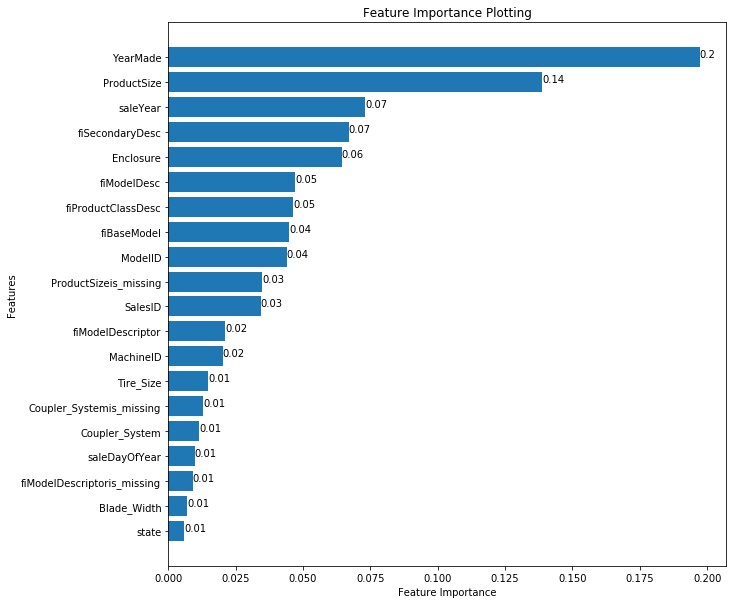

In [308]:
df11 = plot_feature_importance(X_train.columns,model.feature_importances_)

In [318]:
df11[df11["Feature_Importance"] < 0.001].Features

51                 Ripperis_missing
52          Undercarriage_Pad_Width
53                          Coupler
54                     Transmission
55                 Backhoe_Mounting
56         Grouser_Tracksis_missing
57         Enclosure_Typeis_missing
58              Tire_Sizeis_missing
59                            Thumb
60                     Ride_Control
61                  Forksis_missing
62                  Pattern_Changer
63                     Grouser_Type
64                         Pad_Type
65              UsageBandis_missing
66                            Forks
67                  Stickis_missing
68                     Turbocharged
69           Grouser_Typeis_missing
70                Differential_Type
71          auctioneerID_is_missing
72                Steering_Controls
73                Coupleris_missing
74           Ride_Controlis_missing
75       Backhoe_Mountingis_missing
76                            Stick
77              Scarifieris_missing
78        Travel_Controlsis_

In [333]:
X_cat1.columns.contains("missing")

AttributeError: 'str' object has no attribute 'contains'

In [329]:
for i in range(len(X_cat1.columns)):
    if X_cat1.columns[i].str.contains("missing"):
        X_cat1.drop(i,axis =1,inplace = True)      

AttributeError: 'str' object has no attribute 'str'

In [319]:
X_cat1.drop(df11[df11["Feature_Importance"] < 0.001].Features,axis =1,inplace = True)

KeyError: "['fiProductClassDescis_missing' 'fiBaseModelis_missing'\n 'fiModelDescis_missing' 'stateis_missing' 'ProductGroupis_missing'\n 'ProductGroupDescis_missing'] not found in axis"

In [280]:
df_tmp1 = df.copy()

In [281]:
X_cat1 = df_tmp1[df_tmp1["SalePrice"] > 0]
X_cat2 = df_tmp1[df_tmp1["SalePrice"] == 0]

In [282]:
X_cat1.shape, X_cat2.shape

((412698, 53), (12457, 53))

In [283]:
for label,content in X_cat1.items():
    if pd.api.types.is_string_dtype(content):
        X_cat1[label] = content.astype("category").cat.as_ordered() 

<ipython-input-283-319247238c05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat1[label] = content.astype("category").cat.as_ordered()


In [284]:
for label,content in X_cat2.items():
    if pd.api.types.is_string_dtype(content):
        X_cat2[label] = content.astype("category").cat.as_ordered() 

<ipython-input-284-8bfd00470ee9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat2[label] = content.astype("category").cat.as_ordered()


In [285]:
X_cat1["state"].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [288]:
X_cat2["state"].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [292]:
pd.Categorical(X_cat1["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [293]:
pd.Categorical(X_cat2["state"]).codes

array([ 2,  2,  2, ..., 48,  2, 18], dtype=int8)

In [294]:
## From both above results, we determine that we need to split only after converting training and test data into categories for 
## categorical data types. For int/str, we need to fill missing values from training data for training and test data for test
## so that we don't already have data in test within training and viceversa during prediction that can mess the result

In [295]:
preprocess_data(X_cat1)

<ipython-input-243-583b6b84301a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["saleYear"] = df.saledate.dt.year
<ipython-input-243-583b6b84301a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["saleMonth"] =df.saledate.dt.month
<ipython-input-243-583b6b84301a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
76171,1364654,14000.0,1270628,7289,132,99.0,1968,0.0,0,1783,...,True,True,True,True,True,True,True,True,False,False
169757,1597053,12750.0,1100960,8180,132,99.0,1979,0.0,0,944,...,True,True,True,True,True,True,True,True,False,False
115892,1453054,36000.0,1117184,3854,132,99.0,1977,0.0,0,1767,...,True,True,True,True,True,True,True,True,False,False
98567,1415950,40000.0,1142272,3357,132,99.0,1978,0.0,0,83,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411334,6306548,36000.0,1878032,28919,149,99.0,2004,0.0,0,4802,...,True,True,True,True,True,True,True,True,False,False
411319,6306476,53000.0,1278794,9114,149,99.0,2004,0.0,0,4818,...,True,True,True,True,True,True,True,True,False,False
412544,6327732,11000.0,1906978,12524,149,99.0,2006,0.0,0,4550,...,False,False,False,False,False,True,True,True,True,True
406223,6259304,37000.0,1825043,6788,149,99.0,2006,0.0,0,1063,...,True,True,True,True,True,True,True,True,True,True


In [296]:
X_cat1.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_Mountingis_missing     0
Blade_Typeis_missing           0
Travel_Controlsis_missing      0
Differential_Typeis_missing    0
Steering_Controlsis_missing    0
Length: 103, dtype: int64

In [297]:
X_cat1.head().T

,205615,76171,169757,115892,98567
SalesID,1646770,1364654,1597053,1453054,1415950
SalePrice,9500,14000,12750,36000,40000
MachineID,1126363,1270628,1100960,1117184,1142272
ModelID,8434,7289,8180,3854,3357
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mountingis_missing,False,True,True,True,True
Blade_Typeis_missing,False,True,True,True,True
Travel_Controlsis_missing,False,True,True,True,True
Differential_Typeis_missing,True,False,False,False,True
